In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('diamonds.csv (1).zip')
from sklearn.preprocessing import LabelEncoder,StandardScaler
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.drop(['Unnamed: 0'],axis=1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
le=LabelEncoder()
df['cut']=le.fit_transform(df['cut'])
df['color']=le.fit_transform(df['color'])
df['clarity']=le.fit_transform(df['clarity'])



In [6]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

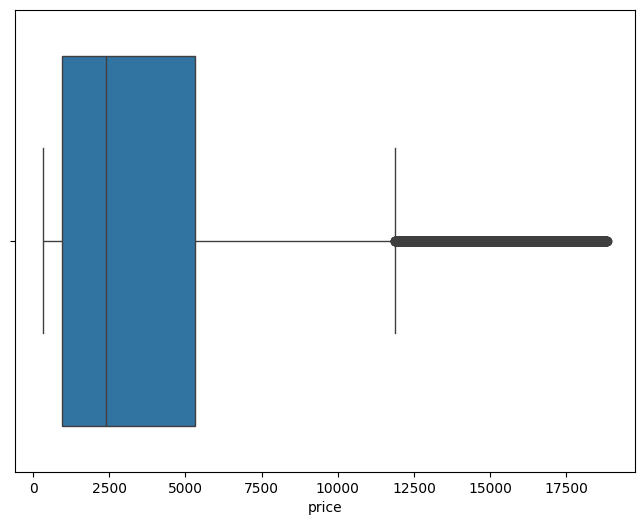

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(x=df['price'])
plt.show()

In [8]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)
outliers=[(df['price']<lower_bound)|(df['price']>upper_bound)]
print(outliers)


4374.25
-5611.375
11885.625
[0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: price, Length: 53940, dtype: bool]


In [9]:
df=df[~((df['price']>=(Q1-1.5*IQR))&(df['price']<(Q3+1.5*IQR)))]

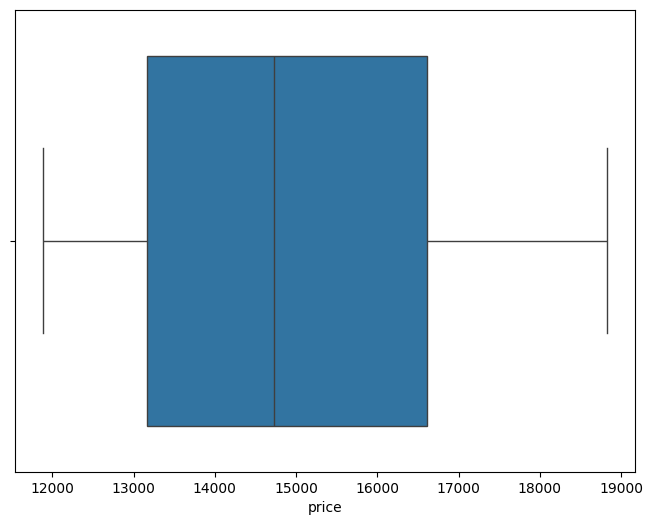

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(x=df['price'])
plt.show()

In [11]:
x=df.drop(['price'],axis=1)
y=df['price']
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.71777037, -1.90264312, -0.65917236, ..., -1.81077162,
        -1.0927262 , -1.54783876],
       [-1.71688867,  0.62300807, -0.65917236, ...,  0.65440438,
         0.24929739,  0.58996783],
       [-1.71600696, -0.43165946,  0.35317912, ..., -0.33876005,
        -0.24049224, -0.21485347],
       ...,
       [ 1.74469985, -0.95899322, -0.65917236, ..., -0.83534227,
        -0.4266123 , -0.66756545],
       [ 1.74558156,  0.4009728 ,  1.36553059, ...,  0.10461693,
         0.12195208,  0.5396665 ],
       [ 1.74646327,  1.20585066,  0.35317912, ...,  1.16872167,
         0.61174171,  0.84147449]], shape=(3540, 10))

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [13]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9912580820809048
148.83286303319878
36015.397568613575


In [31]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))


0.9912580820809048
148.83286303319878
36015.397568613575


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.999991068689062
3.8578154425612055
36.79566854990584


In [32]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9912580820809048
148.83286303319878
36015.397568613575


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9999971022005456
2.285941619585703
11.938501412429684


In [41]:
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9999981895081717
1.9425141242938289
7.458956214689551


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.svm import SVR
model=SVR()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.115952499694848
1649.9838139003969
3642143.8050203593


In [44]:
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.03804922748364159
1701.9603558930187
3963093.6636839737


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)


In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.969754950997502
97.409604519774
124605.08945386064


In [47]:
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)


1.0
0.0
0.0


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [57]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9354778884428858
380.4468926553672
265821.4731826742


In [58]:
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9442481100998329
352.1214689265537
229689.4684369115


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.992713494216325
147.08621965132608
30019.316712163236


In [53]:
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.992713494216325
147.08621965132608
30019.316712163236
